# DNA Damage model formation & Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings(action = 'ignore')

## 1. Preparing Cell Painting Data & Cell Health Data

### Load IDR-0080 Data & Cell Health Data
### Reference : https://pubmed.ncbi.nlm.nih.gov/33534641/

In [3]:
x_df = pd.read_csv('x_df.csv', index_col = None)
x_df = x_df.iloc[:, 1:]
x_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,-0.155631,0.014646,0.188053,1.231056,0.031064,-0.585477,0.467976,0.254203,0.129446,0.027104,...,0.882859,0.841687,0.339831,0.562585,0.879950,0.904785,0.923143,0.944998,0.984938,0.961945
1,-0.247842,-0.030773,0.433778,0.062456,0.266860,0.838679,-0.467417,0.340793,-0.024450,0.418928,...,0.513820,0.344554,0.134318,0.018933,0.359496,0.557998,0.504751,0.407462,0.522251,0.519441
2,0.794740,0.743296,-0.438752,0.827288,-0.728499,-0.422394,-0.147624,0.083870,-0.160722,-0.363004,...,-0.456539,0.373750,-0.111184,-0.042733,-0.840771,-0.536215,-0.497296,-0.748232,-0.515240,-0.526734
3,0.480421,0.821096,-0.337898,0.054479,-0.662314,0.067979,0.025010,0.158138,-0.342062,-0.434783,...,0.115466,0.186411,0.249292,0.688435,-0.521766,0.124801,0.063444,-0.560178,-0.062851,0.026056
4,-0.074895,0.569377,0.571678,0.976504,-1.111947,1.348542,0.584906,-3.128483,-2.324773,1.945741,...,0.154802,2.975785,1.128414,-0.638839,0.753884,0.808944,0.594059,0.674015,0.140325,0.417465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.247953,0.331462,-0.228694,0.648857,-0.394799,-0.477804,-0.203016,0.387554,0.485502,-0.302333,...,0.305814,0.952718,0.697652,0.087784,0.266722,0.254346,0.367875,0.191115,0.220894,0.257950
353,1.455427,1.153796,-1.395398,1.167778,-1.413069,-0.684198,-0.923160,-0.145706,-0.535382,0.224011,...,-0.207834,-0.280317,-0.422648,-0.763835,-0.254697,-0.380000,-0.404530,-0.266026,-0.341998,-0.287431
354,0.719510,0.691270,-0.999921,0.701489,-0.965601,-0.937154,-0.218680,0.145943,-0.149745,-0.637266,...,0.011171,-0.575574,-0.272102,-0.101586,-0.117305,-0.083261,-0.085342,-0.213054,-0.126822,-0.101668
355,-0.255658,0.075113,0.999995,0.251456,0.237111,0.342004,0.084765,0.957639,-0.562746,-0.409896,...,0.766721,0.518347,1.450779,1.421830,1.483743,0.639279,0.614153,1.624128,0.523767,0.603819


In [4]:
# Load cell health data
y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['cc_all_n_spots_h2ax_per_nucleus_area_mean']

### Load Chemical Annotation Data
### Reference : https://gigadb.org/dataset/100351

In [5]:
# Chemical annotation 
chem_dat = pd.read_csv('chemical_annotations.csv')
chem_dat

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN
...,...,...,...,...,...,...,...,...,...,...
30611,BRD-K47092271-001-01-7,BRD-K47092271,BROAD_CPD_ID,SA799574,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCC(=O)Nc1ccc2O[C@@H]3[C@@H](C[C@H](CC(=O)NCC...,NaN
30612,BRD-K30358777-001-01-0,BRD-K30358777,BROAD_CPD_ID,SA800605,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COc1ccc(CNC(=O)C[C@@H]2C[C@H]3[C@H](Oc4ccc(NC(...,NaN
30613,BRD-K32423836-001-01-9,BRD-K32423836,BROAD_CPD_ID,SA799806,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCCNC(=O)C[C@H]1C[C@@H]2[C@@H](Oc3ccc(NC(=O)C...,NaN
30614,BRD-K28250273-001-01-2,BRD-K28250273,BROAD_CPD_ID,SA1482018,Azetidine Nitrile Full Library,Broad Institute of MIT and Harvard,NaN,NaN,OC[C@H]1[C@H]([C@H](C#N)N1C(=O)Nc1cccc(F)c1)c1...,NaN


In [6]:
# Load validation datasets
x_val_dat = pd.read_csv('x_val_df.csv')
x_val_meta = pd.read_csv('x_val_meta.csv')

In [7]:
# Check unique compound in validation dataset
compound = x_val_meta['Metadata_broad_sample'].unique()
len(compound)

30617

# 2. Regression Model Formation & Accuracy Check

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Various Regression Models
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'Support Vector Regressor' : SVR(),
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor(),
    'Bayesian Ridge' : BayesianRidge(),
    'Elastic Net' : ElasticNet(),
    'AdaBoost Regressor' : AdaBoostRegressor(),
    'MLP Regressor' : MLPRegressor(),
    'XGBoost Regressor' : XGBRegressor(),
    'LightGBM Regressor' : LGBMRegressor()
}



# Parameter grids for linear models and tree-based models
linear_param_grids = {
    'Ridge Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Support Vector Regression' : {'C' : [0.1, 1.0, 10.0], 'epsilon' : [0.01, 0.1, 1]},
    'K-Nearest Neighbors Regressor' : {'n_neighbors' : [3, 5, 7, 9]},
    'Bayesian Ridge' : {},
    'Elastic Net' : {'alpha' : [0.1, 1.0, 10.0], 'l1_ratio' : [0.1, 0.5, 0.9]}
}

tree_param_grids = {
    'Decision Tree Regressor' : {'max_depth' : [None, 10, 20, 30]},
    'Random Forest Regressor' : {'n_estimators' : [100, 200, 300], 'max_depth' : [None, 10, 20]},
    'Gradient Boosting Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'AdaBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 1.0]},
    'MLP Regressor' : {'hidden_layer_sizes' : [(50,), (100,), (50, 50)], 'alpha' : [0.0001, 0.001, 0.01]},
    'XGBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'LightGBM Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]}
}


# Results Save
best_models = {}
best_params = {}

# Model Class dict
model_classes = {
    'Ridge Regression' : Ridge,
    'Lasso Regression' : Lasso,
    'Support Vector Regression' : SVR,
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor,
    'Decision Tree Regressor' : DecisionTreeRegressor,
    'Random Forest Regressor' : RandomForestRegressor,
    'Gradient Boosting Regressor' : GradientBoostingRegressor,
    'Bayesian Ridge' : BayesianRidge,
    'Elastic Net' : ElasticNet,
    'AdaBoost Regressor' : AdaBoostRegressor,
    'MLP Regressor' : MLPRegressor,
    'XGBoost Regressor' : XGBRegressor,
    'LightGBM Regressor' : LGBMRegressor    
}

# GridSearchCV and training loop for linear models
for model_name, param_grid in linear_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_


    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')

# GridSearchCV and training loop for tree-based models
for model_name, param_grid in tree_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameteres: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')



# Output the best parameters & r2 score for each model
print('Best parameters:')
for model_name, params in best_params.items():
    print(f'{model_name} : {params}')

Ridge Regression Best Parameters: {'alpha': 100.0}
Ridge Regression (After tuning):
  Mean Squared Error = 0.39955558950436765
  Root Mean Squared Error = 0.6321040970476047
  R² Score = 0.35302215992639363

Lasso Regression Best Parameters: {'alpha': 0.1}
Lasso Regression (After tuning):
  Mean Squared Error = 0.4784338369413725
  Root Mean Squared Error = 0.6916891187096791
  R² Score = 0.2252990608229909

Support Vector Regression Best Parameters: {'C': 10.0, 'epsilon': 0.01}
Support Vector Regression (After tuning):
  Mean Squared Error = 0.4625035611919852
  Root Mean Squared Error = 0.6800761436721517
  R² Score = 0.2510940582322384

K-Nearest Neighbors Regressor Best Parameters: {'n_neighbors': 3}
K-Nearest Neighbors Regressor (After tuning):
  Mean Squared Error = 0.49798832860215597
  Root Mean Squared Error = 0.7056828810465476
  R² Score = 0.1936355749132468

Bayesian Ridge Best Parameters: {}
Bayesian Ridge (After tuning):
  Mean Squared Error = 0.39628142421860146
  Root M

## Regression Results

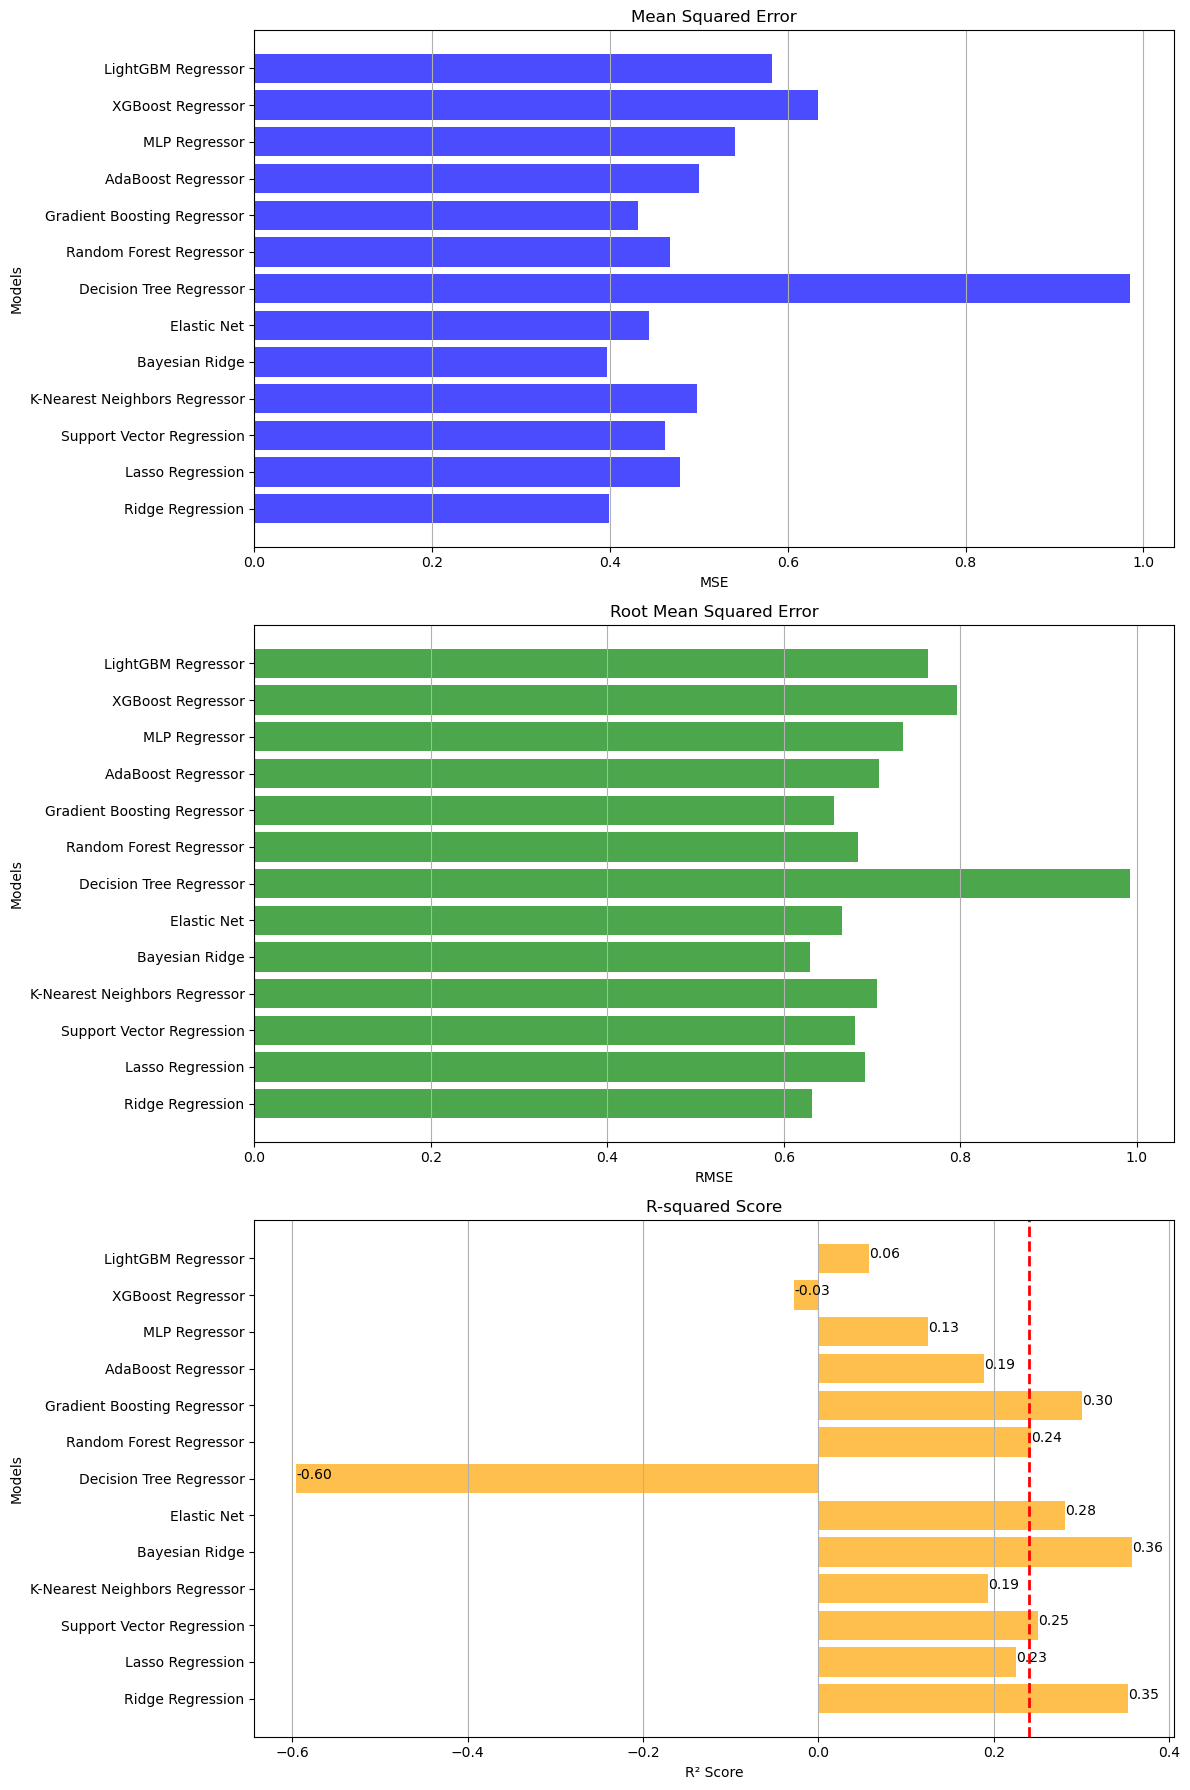

In [13]:
# Initialize lists to store evaluation metrics
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []


# Evaluate and collect scores for each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)


    # Valculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store scores and model names
    model_names.append(model_name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


# Plotting the scores
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))


# Mean Squared Error plot
ax1.barh(model_names, mse_scores, color='blue', alpha=0.7)
ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.set_ylabel('Models')
ax1.xaxis.grid(True)

# Root Mean Squared Error plot
ax2.barh(model_names, rmse_scores, color='green', alpha=0.7)
ax2.set_title('Root Mean Squared Error')
ax2.set_xlabel('RMSE')
ax2.set_ylabel('Models')
ax2.xaxis.grid(True)

# R-squared plot
ax3.barh(model_names, r2_scores, color='orange', alpha=0.7)
for model_name, scores in zip(model_names, r2_scores):
    ax3.text(scores, model_name, f'{scores:.2f}')
ax3.set_title('R-squared Score')
ax3.set_xlabel('R² Score')
ax3.set_ylabel('Models')
ax3.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax3.xaxis.grid(True)

plt.tight_layout()
plt.savefig('accuracy_results.png')
plt.show()

# 3. Cell Health Labeling for Classification Model

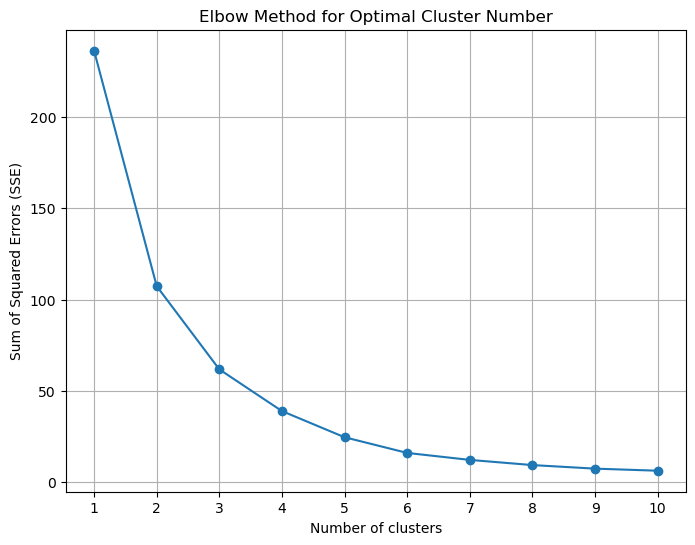

In [8]:
from sklearn.cluster import KMeans

# Create an array to store SSE values for different cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(y_df.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig('Elbow Method.png')
plt.show()

In [9]:
# y_df Categorized

kmeans = KMeans(n_clusters = 6, random_state = 42)
y_clusters = kmeans.fit_predict(y_df.values.reshape(-1, 1))

y_df_binarized = y_clusters

In [10]:
from collections import Counter

Counter(y_df_binarized)

Counter({0: 117, 3: 94, 5: 90, 2: 38, 1: 13, 4: 5})

In [632]:
#y_df.sort_values(ascending = False).to_excel('y_df.xlsx')

In [11]:
# Remapping
mapping = {4: 0, 0: 0, 3: 0, 5: 0, 2: 1, 1: 1} # 0 : Low, 1: High
y_df_binarized = np.vectorize(mapping.get)(y_df_binarized)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [13]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


# 4. Classification Model Formation & Check Accuracy

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}
result = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")
    # Generate the classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store reulst 
    result[model_name] = {
        'f1_score' : report['weighted avg']['f1-score'],
        'accuracy' : report['accuracy']
    }

    
# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Accuracy for RandomForest: 0.8635

Test Accuracy for RandomForest: 0.8796
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        93
           1       0.67      0.27      0.38        15

    accuracy                           0.88       108
   macro avg       0.78      0.62      0.66       108
weighted avg       0.86      0.88      0.86       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-valida

## Classification Accuracy

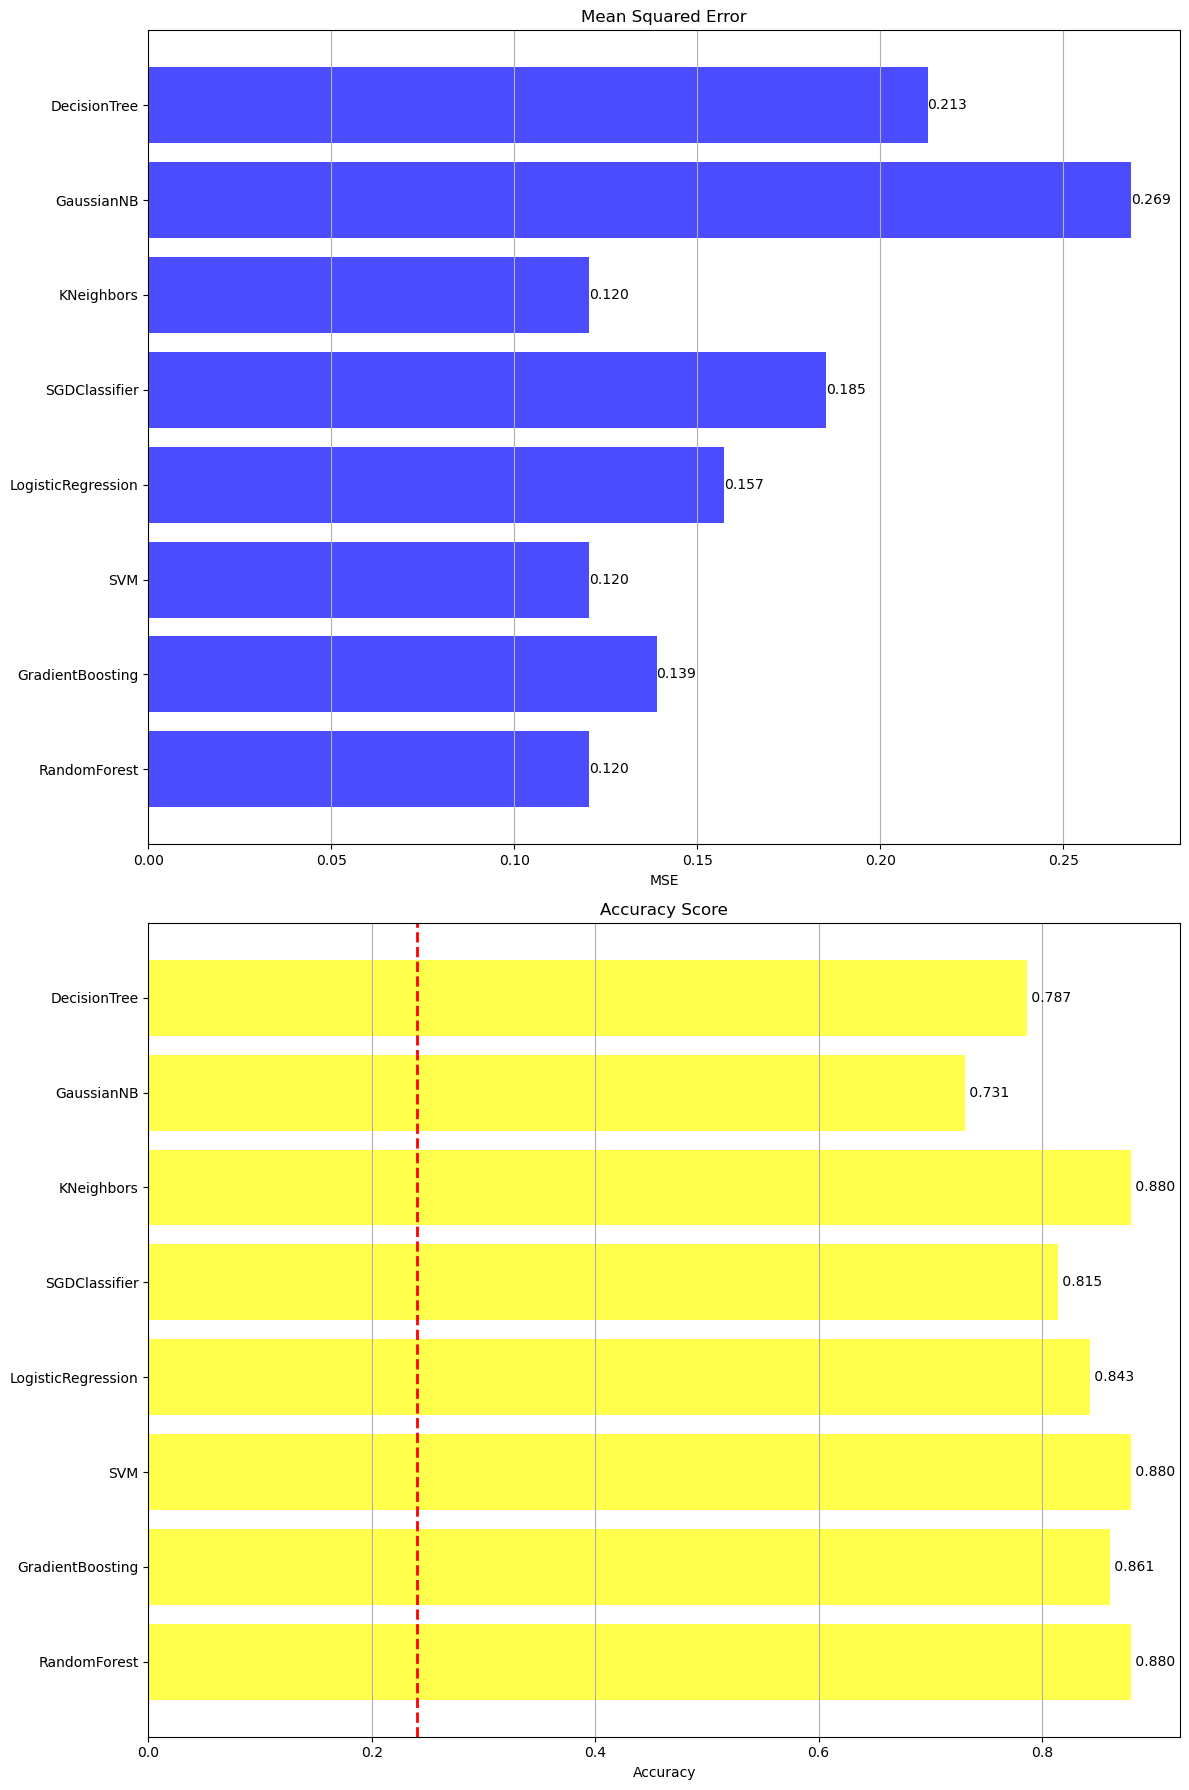

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 18))

for model, metrics in results.items():
    ax1.barh(model, metrics['mse'], color = 'blue', alpha = 0.7)
    ax1.text(metrics['mse'], model, f"{metrics['mse']:.3f}", va = 'center')
    ax2.barh(model, metrics['accuracy'], color = 'yellow', alpha = 0.7)
    ax2.text(metrics['accuracy'], model, f"{metrics['accuracy']: .3f}", va = 'center')



ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.xaxis.grid(True)

ax2.set_title('Accuracy Score')
ax2.set_xlabel('Accuracy')
ax2.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax2.xaxis.grid(True)

plt.tight_layout()
plt.savefig('X.png')
plt.show()

# 5. Deep Learning Model Formation & Check Accuracy

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [18]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [25]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Setting same seed number
tf.random.set_seed(42)


# Optimizer
optimizer = Adam(learning_rate=0.001)

# Model define
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model Compile
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        94,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,217 (411.00 KB)

 Trainable params: 105,217 (411.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Model FIT
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6791 - loss: 0.6608 - val_accuracy: 0.7963 - val_loss: 0.4784
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8385 - loss: 0.4288 - val_accuracy: 0.8889 - val_loss: 0.3698
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.4351 - val_accuracy: 0.7593 - val_loss: 0.4863
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8467 - loss: 0.3883 - val_accuracy: 0.8611 - val_loss: 0.3902
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8570 - loss: 0.3300 - val_accuracy: 0.8148 - val_loss: 0.4661
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8902 - loss: 0.2729 - val_accuracy: 0.8611 - val_loss: 0.4038
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8950 - loss: 0.2306 - val_accuracy: 0.7870 - val_loss: 0.4922
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9004 - loss: 0.2594 - val_accuracy: 0.8519 - val_loss: 0.4001

## Deep Learning Model Results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9119 - loss: 0.2716  
Test Accuracy of the Best Model: 0.9074
Test loss of the Best Model :  0.2913


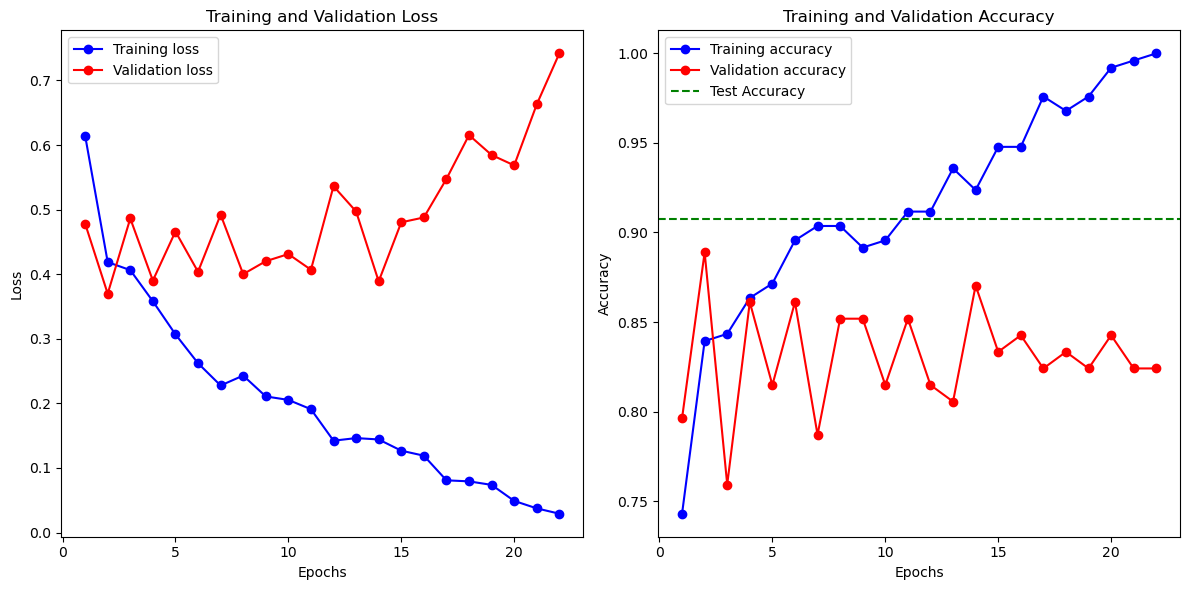

In [28]:
# Save Best Model
best_model = keras.models.load_model('best_model.keras')

# Test data evaluation
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f'Test Accuracy of the Best Model: {test_accuracy:.4f}')
print(f'Test loss of the Best Model : {test_loss: .4f}')

# Assesment scores
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Deep learning results.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


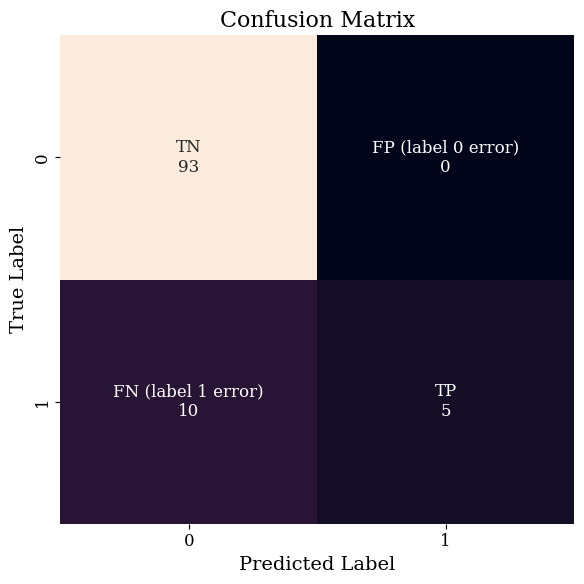

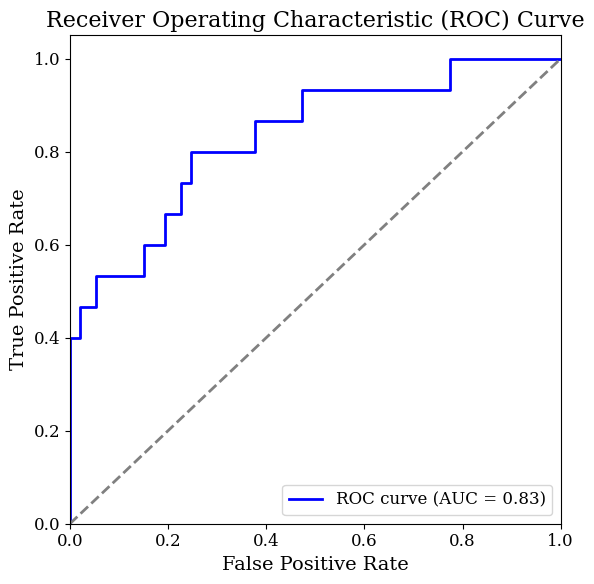

In [71]:
# Confusion Matirx & ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Load Best Model
best_model = keras.models.load_model('best_model.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)


# Annotation 
group_names = ['TN', 'FP (label 0 error)', 'FN (label 1 error)', 'TP']
group_counts = [value for value in conf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot = labels, fmt = '', cbar = False, color = 'Blue')
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.tight_layout()
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=300)
plt.show()

In [81]:
from sklearn.metrics import classification_report

d_report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        93
           1       1.00      0.33      0.50        15

    accuracy                           0.91       108
   macro avg       0.95      0.67      0.72       108
weighted avg       0.92      0.91      0.89       108



In [84]:
# Append Deeplearning result
result['Multilayer Perceptron'] = {
        'f1_score' : d_report['weighted avg']['f1-score'],
        'accuracy' : d_report['accuracy']
    }

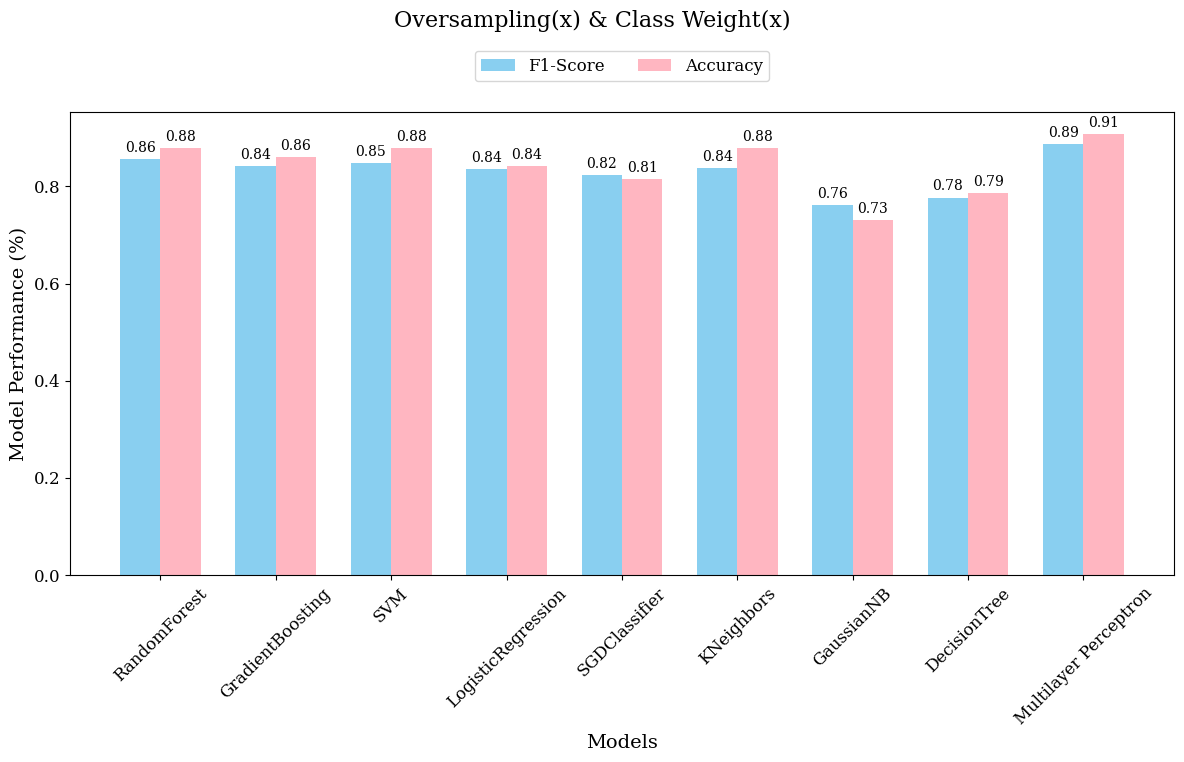

In [89]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Data from the user's dictionary
models = list(result.keys())
f1_scores = [metrics['f1_score'] for metrics in result.values()]
accuracies = [metrics['accuracy'] for metrics in result.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

# Minimize the title or remove it, based on PNAS style preference
plt.suptitle('Oversampling(x) & Class Weight(x)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('No option.png', dpi = 300)
plt.show()

# 6. Prediction with validation dataset

In [4]:
# Load Validation Data
x_val_df = pd.read_csv('x_val_df.csv')
x_val_df = x_val_df.iloc[:, 1:]
x_val_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,0.001517,0.277820,0.504330,0.872770,-0.062229,-0.097463,-0.136418,1.363021,-0.121675,0.111071,...,0.012441,-0.515965,-0.125886,0.378361,-0.192612,0.263924,0.134799,-0.065563,0.159910,0.150347
1,0.034036,0.090993,0.306434,0.485507,0.052555,-0.031708,-0.116941,0.108810,-0.257286,0.182884,...,0.148373,-0.708293,-0.168461,0.159921,0.005949,0.278903,0.181974,0.119256,0.289176,0.263372
2,-0.418352,-0.452332,0.874477,-0.128444,0.677804,0.464805,0.139284,0.689670,0.092896,-0.396120,...,1.174464,1.873223,0.559107,1.438213,1.659821,1.049936,1.254289,0.822218,1.143912,1.200041
3,-0.302987,-0.107649,0.926159,0.397246,0.287252,-0.666721,0.485750,0.286509,-0.249060,0.851031,...,0.402387,-0.358765,-0.296739,0.925500,-0.294972,0.741252,0.544289,-0.375331,0.497514,0.527436
4,1.015297,0.971762,-0.344257,0.236280,-0.908705,0.246192,-1.322807,0.577879,-0.200651,0.544807,...,1.195175,-0.566205,-0.462147,0.560941,-0.435885,1.580252,1.477814,-0.779816,1.448586,1.502258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,-0.265613,-0.433268,0.493264,-0.545809,0.505944,-0.235360,0.530636,0.305867,-0.243942,-0.247084,...,-0.166256,-0.606686,-1.410230,-1.127026,-0.063554,-0.134207,-0.174389,0.904218,-0.093846,-0.130101
30613,-0.210157,-0.305976,0.503456,-0.028201,0.453887,0.195480,0.276551,0.262468,0.886899,-0.258701,...,-0.326757,-0.692443,-1.197271,-1.103457,0.064433,-0.189828,-0.262928,0.950440,-0.374726,-0.343942
30614,0.597644,0.486508,-0.388333,-0.393189,-0.434949,0.348865,-0.739404,-0.280500,0.231109,-0.160809,...,0.281298,-0.558976,-0.394671,-0.123102,-0.271379,0.429285,0.213798,-0.222311,0.061249,0.132184
30615,0.806925,0.851465,-0.373886,0.048235,-0.452466,-0.217211,-0.818209,0.555877,0.007761,0.535272,...,0.762975,-1.044746,-0.611885,0.340107,-0.832198,0.986590,0.869581,-1.017756,0.612146,0.618390


In [5]:
# Validation
y_pred_prob = best_model.predict(x_val_df)

# prediction rate cutoff x > 0.5 : 1
y_pred = (y_pred_prob > 0.5).astype(int)

957/957 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


In [6]:
# Compound Metadata
x_val_dff = pd.read_csv('x_val_dff.csv')
x_val_dff = x_val_dff.iloc[:, 1:]

In [7]:
# Check location of DNA Damage High Labeld Data
hit_comp = np.flatnonzero(y_pred != 0)

In [11]:
comp_name = []
for idx in hit_comp:
    value = x_val_dff.loc[idx, 'Metadata_broad_sample']
    name = chem_dat[chem_dat['BROAD_ID'] == value]['CPD_NAME'].tolist()
    comp_name.append(name)

# Remove DMSO
comp_name = [v for v in comp_name if v]

print(len(comp_name))
print(display(comp_name))

119


[['BRD-A21877498'],
 ['methotrexate'],
 ['BRD-A62591979'],
 ['ancitabine'],
 ['BRD-K01358448'],
 ['BRD-K02653676'],
 ['BRD-K05057860'],
 ['BRD-K06651637'],
 ['BRD-K07237640'],
 ['BRD-K08318631'],
 ['BRD-K08416835'],
 ['BRD-K09521750'],
 ['BRD-K10666842'],
 ['BRD-K11644911'],
 ['5-nitroso-8-cinnolinol'],
 ['BRD-K13211285'],
 ['BRD-K13748175'],
 ['BRD-K16093370'],
 ['BRD-K18092396'],
 ['BRD-K18371519'],
 ['BRD-K18667904'],
 ['BRD-K19340473'],
 ['BRD-K20741178'],
 ['BRD-K21968411'],
 ['BRD-K22500599'],
 ['BRD-K24318151'],
 ['BRD-K25467556'],
 ['BRD-K25566775'],
 ['BRD-K25743539'],
 ['BRD-K26666618'],
 ['BRD-K27424042'],
 ['BRD-K27788917'],
 ['BRD-K28448768'],
 ['BRD-K28548873'],
 ['BRD-K28658046'],
 ['BRD-K28862419'],
 ['BRD-K30213116'],
 ['BRD-K30278324'],
 ['BRD-K32000549'],
 ['BRD-K33017576'],
 ['BRD-K33979719'],
 ['BRD-K34327142'],
 ['BRD-K34385682'],
 ['BRD-K34954550'],
 ['BRD-K35039537'],
 ['hinokitiol'],
 ['etoposide'],
 ['BRD-K40681259'],
 ['acetazolamide'],
 ['BRD-K43650237'],
 [

None


In [24]:
comp_list = pd.DataFrame()
for idx in hit_comp:
    value = x_val_dff.loc[idx, 'Metadata_broad_sample']
    name = chem_dat[chem_dat['BROAD_ID'] == value]

    comp_list = pd.concat([comp_list, name], ignore_index = True)



comp_list.to_excel('comp_list.xlsx')